## Importando as Bibliotecas

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sympy import symbols, integrate, Piecewise, sqrt

## Implementação Inicial carregando e as bases de dados

In [58]:
df = pd.read_csv("C:/Users/Cristiano/OneDrive - Belago Technologies/Documentos/projeto_fnt/data/ZAR-21106_20200205_20231107.csv")
df2 = pd.read_csv("C:/Users/Cristiano/OneDrive - Belago Technologies/Documentos/projeto_fnt/data/ZAR-20001336_20231108_20241227.csv")

C:\Users\Cristiano\AppData\Local\Temp\ipykernel_9780\1806991170.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [72]:
df.head(2)

,uid,regiao,operacao,original,descritivo,temperatura,temperaturatermometro,responsavel,substituidopor,amplitude,status,checkedat,dataref,year,month,day
0,thermo_ID_21106_20200205_194353,NORTE,araraquara,thermo_ID_21106,NaN,28.0,28.0,NaN,NaN,8.0,Normal,2020-02-05 19:43:53,2020-02-05,2020,2,5
1,thermo_ID_21106_20200205_195351,NORTE,araraquara,thermo_ID_21106,NaN,28.0,28.0,NaN,NaN,8.0,Normal,2020-02-05 19:53:51,2020-02-05,2020,2,5


In [73]:
df2.head(2)

,uid,regiao,operacao,original,descritivo,temperatura,temperaturatermometro,responsavel,substituidopor,amplitude,status,checkedat,dataref,year,month,day
0,thermo_id_20001336_20231108_085106,NORTE,zsozar-zarzoi3-244450,thermo_id_20001336,NaN,37.6,37.6,NaN,NaN,0.0,Normal,2023-11-08 08:51:06,2023-11-08,2023,11,8
1,thermo_id_20001336_20231108_095105,NORTE,zsozar-zarzoi3-244450,thermo_id_20001336,NaN,42.9,42.9,NaN,NaN,6.7,Normal,2023-11-08 09:51:05,2023-11-08,2023,11,8


In [74]:
# Concatenar os dois dataframes
df_combined = pd.concat([df, df2], ignore_index=True)
df_combined['operacao'] = 'araraquara'
df_combined.drop(columns=['uid', 'descritivo', 'temperatura', 'responsavel', 'substituidopor', 'checkedat'], inplace=True)

In [83]:
df_normal = df_combined

## Análise de Dados

In [84]:
# Classificar erros no DataFrame
df_normal['error_category'] = df_normal.apply(
    lambda row: row['status'] if row['status'] != 'Normal' else ('Erro Consistência' if row['temperaturatermometro'] < 0 or row['temperaturatermometro'] > 65 else 'Normal'),
    axis=1
)

In [85]:
# 1a) Quantidade e porcentagem de medidas com status Normal X Com qualquer erro
status_counts = df_normal['error_category'].value_counts()
total_measures = len(df_normal)
status_percentages = (status_counts / total_measures * 100).round(2)

In [86]:
status_percentages

error_category
Normal               91.18
ErroTOCF              6.11
ManualEquipamento     1.57
ErroTO                1.05
Erro Consistência     0.09
Name: count, dtype: float64

In [87]:
# Abertura mensal
df_normal['year_month'] = df_normal['year'].astype(str) + '-' + df_normal['month'].astype(str).str.zfill(2)
monthly_status_counts = df_normal.groupby(['year_month', 'error_category']).size().unstack(fill_value=0)
monthly_status_percentages = (monthly_status_counts.div(monthly_status_counts.sum(axis=1), axis=0) * 100).round(2)

In [88]:
monthly_status_percentages

error_category,Erro Consistência,ErroTO,ErroTOCF,ManualEquipamento,Normal
year_month,,,,,
2020-02,0.00,0.00,1.53,0.00,98.47
2020-03,0.00,0.00,68.58,0.00,31.42
2020-04,0.00,0.00,16.34,0.00,83.66
2020-05,0.00,0.00,2.84,9.97,87.19
2020-06,0.00,0.00,0.08,0.00,99.92
2020-07,0.00,0.00,0.04,0.00,99.96
2020-08,0.00,0.00,0.05,0.00,99.95
2020-09,0.00,0.00,0.00,0.00,100.00
2020-10,0.00,0.00,0.00,0.00,100.00


In [89]:
# 1b) Quantidade e porcentagem de cada tipo de erro em relação ao total de medidas com erro
error_measures = df_normal[df_normal['error_category'] != 'Normal']
error_counts = error_measures['error_category'].value_counts()
total_errors = len(error_measures)
error_percentages = (error_counts / total_errors * 100).round(2)

In [90]:
error_percentages

error_category
ErroTOCF             69.32
ManualEquipamento    17.83
ErroTO               11.87
Erro Consistência     0.98
Name: count, dtype: float64

In [91]:
# Abertura mensal de erros
total_monthly_errors = error_measures.groupby('year_month')['error_category'].value_counts().unstack(fill_value=0)
monthly_error_percentages = (total_monthly_errors.div(total_monthly_errors.sum(axis=1), axis=0) * 100).round(2)

In [92]:
monthly_error_percentages

error_category,Erro Consistência,ErroTO,ErroTOCF,ManualEquipamento
year_month,,,,
2020-02,0.00,0.00,100.00,0.00
2020-03,0.00,0.00,100.00,0.00
2020-04,0.00,0.00,100.00,0.00
2020-05,0.00,0.00,22.15,77.85
2020-06,0.00,0.00,100.00,0.00
2020-07,0.00,0.00,100.00,0.00
2020-08,0.00,0.00,100.00,0.00
2020-11,0.00,0.00,88.14,11.86
2021-01,0.00,0.00,1.33,98.67


In [95]:
# 2) Análise Exploratória dos Dados
clean_data = df_normal[df_normal['error_category'] == 'Normal']
clean_data

,regiao,operacao,original,temperaturatermometro,amplitude,status,dataref,year,month,day,error_category,year_month
0,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
1,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
2,NORTE,araraquara,thermo_ID_21106,28.0,8.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
3,NORTE,araraquara,thermo_ID_21106,26.0,6.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
4,NORTE,araraquara,thermo_ID_21106,24.0,4.0,Normal,2020-02-05,2020,2,5,Normal,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...
236616,NORTE,araraquara,thermo_id_20001336,60.7,61.7,Normal,2024-12-21,2024,12,21,Normal,2024-12
236617,NORTE,araraquara,thermo_id_20001336,56.1,57.1,Normal,2024-12-21,2024,12,21,Normal,2024-12
236634,NORTE,araraquara,thermo_id_20001336,62.4,38.5,Normal,2024-12-22,2024,12,22,Normal,2024-12
237775,NORTE,araraquara,thermo_id_20001336,58.7,34.5,Normal,2024-12-27,2024,12,27,Normal,2024-12


In [96]:
# Máximas e mínimas absolutas por ano
yearly_stats = clean_data.groupby('year')['temperaturatermometro'].agg(['min', 'max'])
yearly_stats

,min,max
year,,
2020,4.0,54.0
2021,0.0,55.0
2022,4.0,54.0
2023,0.0,58.8
2024,0.3,63.2


In [97]:
# Máximas e mínimas absolutas por mês e ano
monthly_stats = clean_data.groupby(['year', 'month'])['temperaturatermometro'].agg(['min', 'max']).reset_index()
monthly_stats

,year,month,min,max
0,2020,2,15.0,52.0
1,2020,3,14.0,52.0
2,2020,4,11.0,48.0
3,2020,5,4.0,41.0
4,2020,6,8.0,44.0
5,2020,7,4.0,42.0
6,2020,8,7.0,47.0
7,2020,9,13.0,52.0
8,2020,10,14.0,53.0
9,2020,11,10.0,54.0


In [98]:
# Criando uma coluna para a estação do ano (considerando hemisfério sul)
clean_data['season'] = clean_data['month'].apply(
    lambda month: 'Verão' if month in [12, 1, 2] else ('Outono' if month in [3, 4, 5] else ('Inverno' if month in [6, 7, 8] else 'Primavera'))
)

C:\Users\Cristiano\AppData\Local\Temp\ipykernel_9780\2623741774.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## BoxPlot Distribuição de Temperaturas por Estação do Ano

C:\Users\Cristiano\AppData\Local\Temp\ipykernel_9780\388667117.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




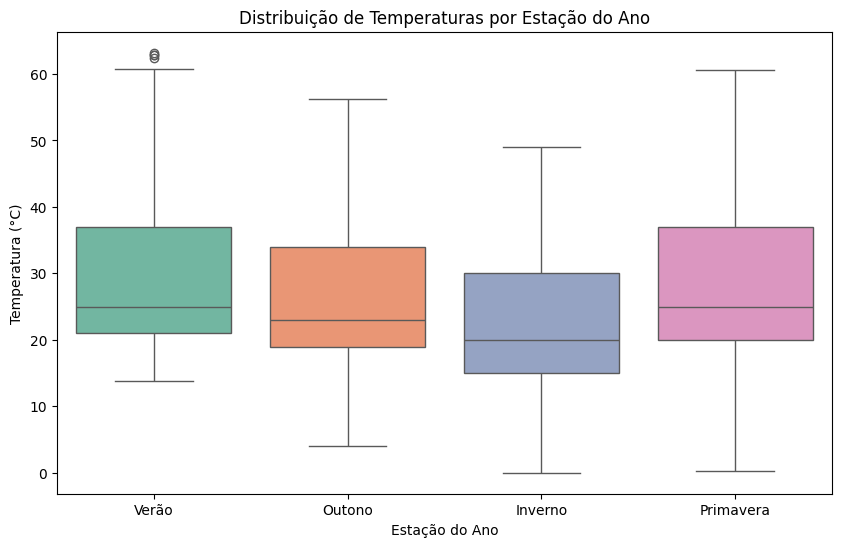

In [99]:
# Boxplot de temperaturas por estação do ano
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='temperaturatermometro', data=clean_data, palette='Set2')
plt.title('Distribuição de Temperaturas por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Temperatura (°C)')
plt.show()

In [100]:
# Resultados das análises
print("\n1a) Status Normal X Erros (Geral):")
print(status_counts)
print(status_percentages)


1a) Status Normal X Erros (Geral):
error_category
Normal               216850
ErroTOCF              14542
ManualEquipamento      3740
ErroTO                 2490
Erro Consistência       205
Name: count, dtype: int64
error_category
Normal               91.18
ErroTOCF              6.11
ManualEquipamento     1.57
ErroTO                1.05
Erro Consistência     0.09
Name: count, dtype: float64


In [101]:
print("\n1a) Status Normal X Erros (Mensal):")
print(monthly_status_counts)
print(monthly_status_percentages)


1a) Status Normal X Erros (Mensal):
error_category  Erro Consistência  ErroTO  ErroTOCF  ManualEquipamento  Normal
year_month                                                                    
2020-02                         0       0        53                  0    3413
2020-03                         0       0      3617                  0    1657
2020-04                         0       0       764                  0    3913
2020-05                         0       0       140                492    4303
2020-06                         0       0         3                  0    3718
2020-07                         0       0         2                  0    4462
2020-08                         0       0         2                  0    4155
2020-09                         0       0         0                  0    4307
2020-10                         0       0         0                  0    4380
2020-11                         0       0        52                  7    4282
2020-12        

In [102]:
print("\n1b) Tipos de Erro (Geral):")
print(error_counts)
print(error_percentages)


1b) Tipos de Erro (Geral):
error_category
ErroTOCF             14542
ManualEquipamento     3740
ErroTO                2490
Erro Consistência      205
Name: count, dtype: int64
error_category
ErroTOCF             69.32
ManualEquipamento    17.83
ErroTO               11.87
Erro Consistência     0.98
Name: count, dtype: float64


In [103]:
print("\n1b) Tipos de Erro (Mensal):")
print(total_monthly_errors)
print(monthly_error_percentages)


1b) Tipos de Erro (Mensal):
error_category  Erro Consistência  ErroTO  ErroTOCF  ManualEquipamento
year_month                                                            
2020-02                         0       0        53                  0
2020-03                         0       0      3617                  0
2020-04                         0       0       764                  0
2020-05                         0       0       140                492
2020-06                         0       0         3                  0
2020-07                         0       0         2                  0
2020-08                         0       0         2                  0
2020-11                         0       0        52                  7
2021-01                         0       0         1                 74
2021-03                         0       0         3                753
2021-05                         0       0        60                  0
2021-08                         0       0       

In [104]:
print("\n2) Máximas e Mínimas Absolutas por Ano:")
print(yearly_stats)


2) Máximas e Mínimas Absolutas por Ano:
      min   max
year           
2020  4.0  54.0
2021  0.0  55.0
2022  4.0  54.0
2023  0.0  58.8
2024  0.3  63.2


In [105]:
print("\n2) Máximas e Mínimas Absolutas por Mês e Ano:")
print(monthly_stats)


2) Máximas e Mínimas Absolutas por Mês e Ano:
    year  month   min   max
0   2020      2  15.0  52.0
1   2020      3  14.0  52.0
2   2020      4  11.0  48.0
3   2020      5   4.0  41.0
4   2020      6   8.0  44.0
5   2020      7   4.0  42.0
6   2020      8   7.0  47.0
7   2020      9  13.0  52.0
8   2020     10  14.0  53.0
9   2020     11  10.0  54.0
10  2020     12  17.0  54.0
11  2021      1  16.0  55.0
12  2021      2  15.0  52.0
13  2021      3  15.0  51.0
14  2021      4  11.0  47.0
15  2021      5   7.0  44.0
16  2021      6   2.0  42.0
17  2021      7   0.0  45.0
18  2021      8   7.0  49.0
19  2021      9  12.0  50.0
20  2021     10  12.0  49.0
21  2021     11  12.0  55.0
22  2021     12  14.0  52.0
23  2022      1  17.0  53.0
24  2022      2  16.0  49.0
25  2022      3  17.0  50.0
26  2022      4   9.0  50.0
27  2022      5   4.0  47.0
28  2022      6   5.0  43.0
29  2022      7   8.0  45.0
30  2022      8   6.0  48.0
31  2022      9   8.0  49.0
32  2022     10  14.0  54.0
3